In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime

In [2]:
data = pd.read_csv('test_data.csv')

In [3]:
data

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11
5,1.555419e+09,view,CPC,0,no_agency,client_265,campaign_13516,ad_13517,android,2019-04-16
6,1.555146e+09,report,CPM,0,no_agency,client_22021,campaign_34637,ad_34651,mvk,2019-04-13
7,1.554503e+09,view,CPM,0,agency_155,client_105617,campaign_106015,ad_106015,iphone,2019-04-05
8,1.554941e+09,view,CPM,0,no_agency,client_264,campaign_13491,ad_13513,android,2019-04-10
9,1.554719e+09,view,CPM,0,no_agency,client_1728,campaign_19254,ad_19255,android,2019-04-08


In [4]:
date_list = sorted(set(data.date.values))

ad_number = []
for i in date_list:
    ad_number.append(len(data[data.date == i]))

### График числа объявлений по дням:

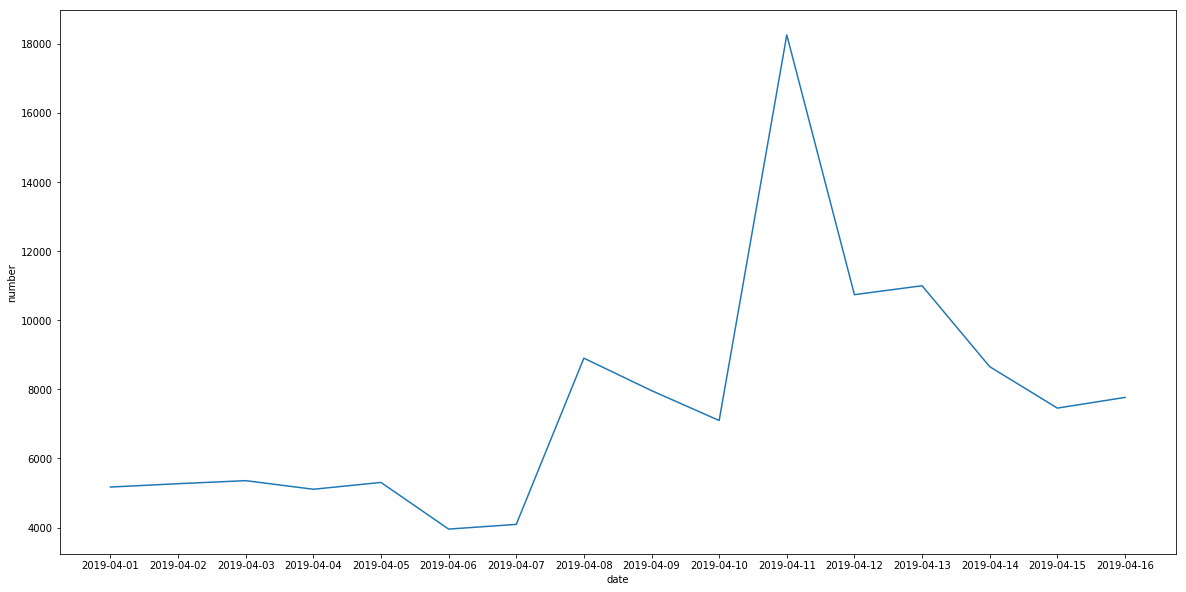

In [6]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(date_list,ad_number)

plt.xlabel('date')
plt.ylabel('number')

plt.show()

На графике видно, что резкое изменение в количестве объявлений приходится на 11 апреля 2019.

In [7]:
peak = '2019-04-11'
l = list(map(int,peak.split('-')))
l

[2019, 4, 11]

In [8]:
date = datetime.datetime(l[0],l[1],l[2])
date.weekday()

3

11 апреля 2019 - среда, не выходной и не праздничный день, следовательно не влияло на скачок.

In [9]:
peak_day = data[data.date == peak]
campaigns = list(set(peak_day.campaign_union_id.values))

campaigns - список кампвний, проходящих в этот день

d_f - таблица количества объявлений за день для кампаний

In [10]:
num = []
for i in campaigns:
    num.append(len(peak_day[peak_day.campaign_union_id == i]))
camp_dict = {'campaign_union_id': campaigns,'number_of_ad': num}
d_f = pd.DataFrame(camp_dict)
d_f

,campaign_union_id,number_of_ad
0,campaign_39657,1
1,campaign_46458,1
2,campaign_2779,8
3,campaign_17848,1
4,campaign_45746,1
5,campaign_16847,3
6,campaign_40360,1
7,campaign_35986,1
8,campaign_38611,1
9,campaign_15154,2


av - среднее количество рекламных объявлений для каждой кампании, max_n - наибольшее число обявлений

In [13]:
max_n = max(list(set(d_f.number_of_ad.values)))
av = np.average(list(set(d_f.number_of_ad.values)))
print(max_n, av)

13941 447.4848484848485


In [14]:
active_c = list(d_f[d_f.number_of_ad == max_n].values[0])[0] # id наиболле активной кампании
active_c

'campaign_49554'

Для active_c проанализируем количество размещаемых рекламных объявлений за весь период: несложно заметить скачок 11 апреля (так же как и для общих данных).

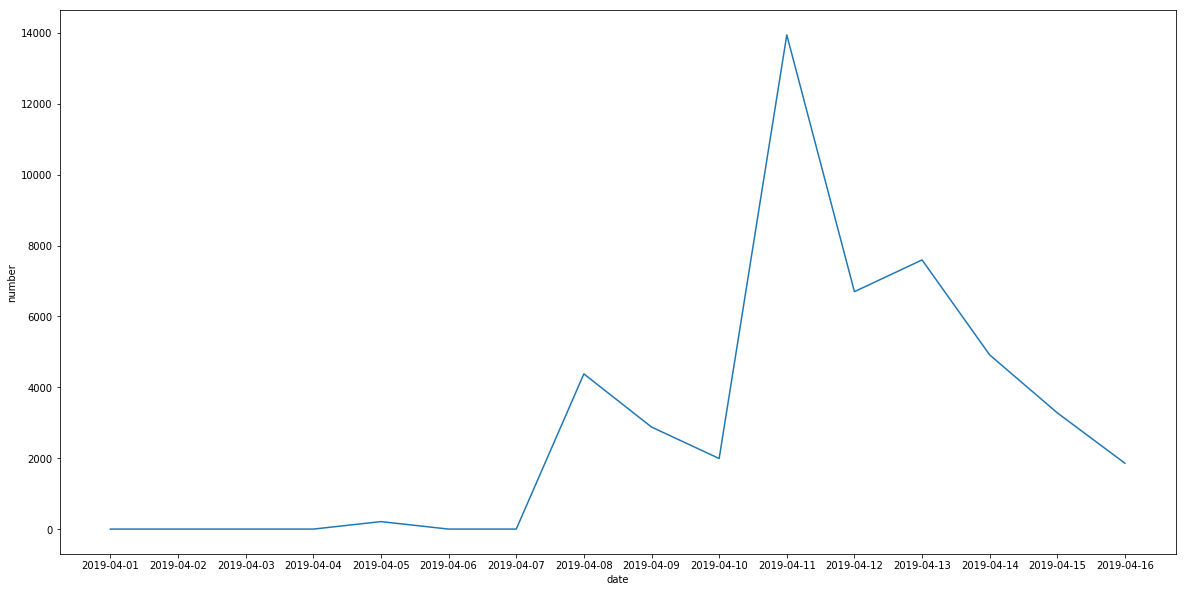

In [15]:
active_df = data[data.campaign_union_id == active_c]
num_act = []
for i in date_list:
    num_act.append(len(active_df[active_df.date == i].values))
    
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(date_list,num_act)

plt.xlabel('date')
plt.ylabel('number')
plt.show()

In [140]:
d_f[d_f.number_of_ad > av]

,campaign_union_id,number_of_ad
1595,campaign_49554,13941


Посмотрим на среденее количество сообщений без учёта "самой активной" капмании

In [16]:
d_f_without = d_f[d_f.campaign_union_id != 'campaign_49554']

av_without = np.average(list(set(d_f_without.number_of_ad.values)))
av_without

25.8125

Нетрудно заметить, что среднее значение av_without значительно меньше общего, а также графики количества рекламных объявлений по дням для всех кампаний и для кампании с id 'campaign_49554' похожи, поэтому можно сделать вывод, что одной из причин скачака 11 апреля является скачок количества объявлений для кампании id 'campaign_49554' в этот же день.

In [116]:
df_active = data[data.campaign_union_id == active_c]
df_active

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
10,1.554738e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49564,web,2019-04-08
11,1.555170e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-13
14,1.555252e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-14
19,1.555011e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
20,1.555061e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-12
22,1.554977e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
23,1.555067e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49556,android,2019-04-12
24,1.555396e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-16
25,1.554964e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,android,2019-04-11
27,1.555061e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-12


In [117]:
set(df_active.agency_union_id.values)

{'agency_2'}

In [118]:
set(df_active.client_union_id.values)

{'client_47270'}

Рекламная кампания находится в кабинете клиента client_47270 из рекламного агенства agency_2

In [66]:
ad_list = list(set(active_df.ad_id.values))
ad_list # рекламные объявления наиболее активной кампании

['ad_49556', 'ad_50872', 'ad_49554', 'ad_49564', 'ad_49560']

In [67]:
ad_id_df = data[['date', 'ad_id']]

In [68]:
statistic_ad = {}
for i in ad_list:
    d = {}
    df_loc = ad_id_df[ad_id_df.ad_id== i]
    for j in date_list:
        d[j] = len(list(df_loc[df_loc.date == j].values))
    statistic_ad[i] = d

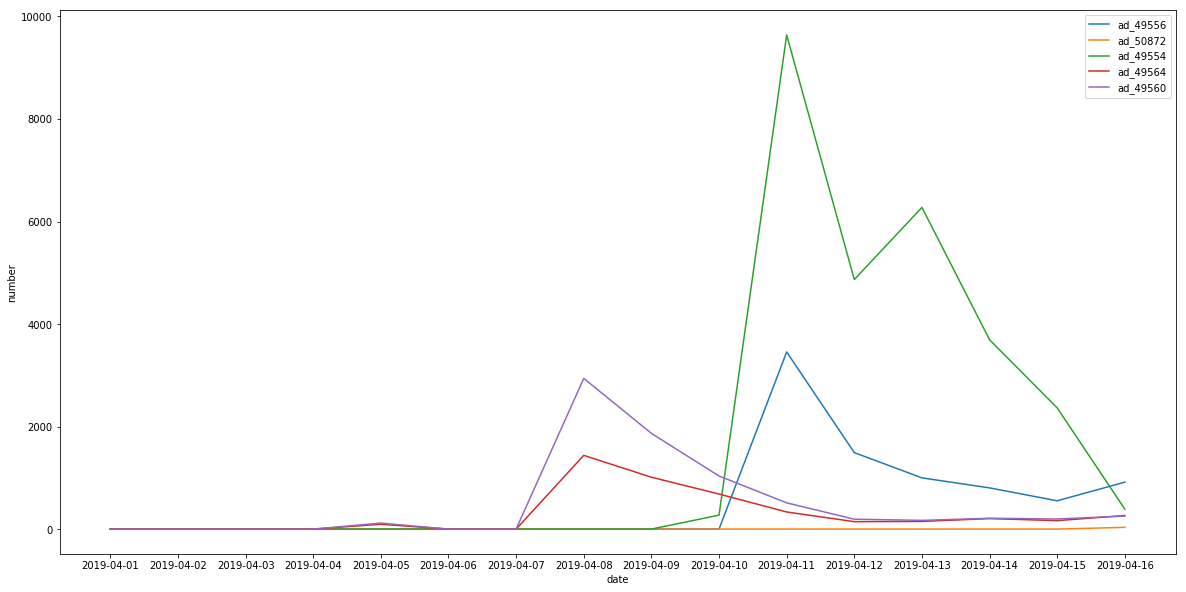

In [69]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]

for i in ad_list:
    plt.plot(date_list,list(statistic_ad[i].values()),label = i)

plt.xlabel('date')
plt.ylabel('number')
plt.legend()

plt.show()

Из графика видно, что 11 апреля рекламная кампания с id 'campaign_49554' запустила 2 новые рекламы - ad_49554 и ad_49556, что привело к резкому увеличению числа рекламных сообщений за день.

In [86]:
ss = [sum(list(i.values())) for i in list(statistic_ad.values())]
ss = list(map(ss.index, sorted(ss)[-2::]))
peak_ad = [list(statistic_ad.keys())[x] for x in ss]
peak_ad
# id рекламных объявлений

['ad_49556', 'ad_49554']

Просмотрим параметры этих сообщений

In [104]:
if_ad_49556 = data[data.ad_id == peak_ad[0]][['event','ad_cost_type','platform','has_video']]
if_ad_49554 = data[data.ad_id == peak_ad[1]][['event','ad_cost_type','platform','has_video']]

In [105]:
inf_56 = [set(if_ad_49556.event.values),set(if_ad_49556.ad_cost_type.values),set(if_ad_49556.platform.values),set(if_ad_49556.has_video.values)]
inf_54 = [set(if_ad_49554.event.values),set(if_ad_49554.ad_cost_type.values),set(if_ad_49554.platform.values),set(if_ad_49554.has_video.values)]

In [106]:
inf_56

[{'click', 'view'}, {'CPC'}, {'android', 'iphone', 'mvk', 'web'}, {0}]

In [107]:
inf_54

[{'click', 'report', 'view'},
 {'CPC'},
 {'android', 'iphone', 'mvk', 'web'},
 {0}]

In [109]:
inf_dict_54 = {}
for i in inf_54[2]:
    inf_dict_54[i] = len(if_ad_49554[if_ad_49554.platform == i].values)
inf_dict_54

{'iphone': 2197, 'web': 2107, 'mvk': 2154, 'android': 21042}

In [110]:
inf_dict_56 = {}
for i in inf_56[2]:
    inf_dict_56[i] = len(if_ad_49556[if_ad_49556.platform == i].values)
inf_dict_56

{'iphone': 804, 'web': 806, 'mvk': 526, 'android': 6082}

Проверим статистику платформ

In [24]:
platform_df = data[['date','platform']]

In [26]:
platforms = list(set(platform_df.platform.values))

In [40]:
statistic_p = {}
for i in platforms:
    d = {}
    df_loc = platform_df[platform_df.platform == i]
    for j in date_list:
        d[j] = len(list(df_loc[df_loc.date == j].values))
    statistic_p[i] = d

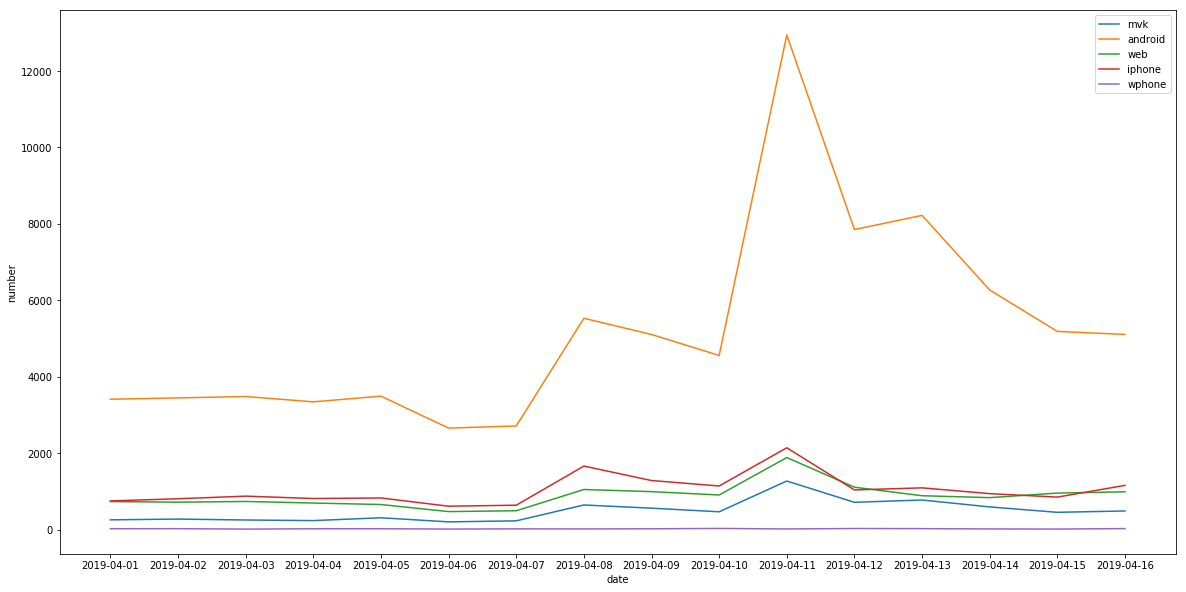

In [41]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]

for i in platforms:
    plt.plot(date_list,list(statistic_p[i].values()),label = i)

plt.xlabel('date')
plt.ylabel('number')
plt.legend()

plt.show()

11 апреля - скачок для android  
### Вывод:    
11 апреля 2019 рекламная кампания с id 'campaign_49554', которрая находится в кабинете клиента client_47270 из рекламного агенства agency_2, разместила новые рекламные объявления: ad_49554 и ad_49556, что привело к резкому увеличению числа рекламных сообщений за день. Наибольшее влияние оказало объявление ad_49554 типа 'CPC', не содержащее видеоролик. Чаще всего эти объявления просматривались с android платформы, что объясняет резкое увеличение количества рекламных сообщений просмотренных с данной платформы за этот день.